In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
# Clone dataset
!git clone https://github.com/Mouneshgouda/Brain-Tumor-Data-Set


Cloning into 'Brain-Tumor-Data-Set'...
remote: Enumerating objects: 4076, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4076 (delta 0), reused 0 (delta 0), pack-reused 4073 (from 2)
Receiving objects: 100% (4076/4076), 92.33 MiB | 28.93 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (4855/4855), done.


In [3]:
IMG_SIZE = 150
BATCH_SIZE = 32

train_path = "/content/Brain-Tumor-Data-Set/Brain Tumor Data Set/Train"
test_path  = "/content/Brain-Tumor-Data-Set/Brain Tumor Data Set/Test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

print(train_generator.class_indices)


Found 3903 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
{'Cancer': 0, 'Not cancer': 1}


**CNN MODEL**

In [4]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

cnn.fit(train_generator, epochs=10, validation_data=test_generator)
cnn.evaluate(test_generator)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.6964 - loss: 0.7436 - val_accuracy: 0.7937 - val_loss: 0.4314
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.9282 - loss: 0.2017 - val_accuracy: 0.9442 - val_loss: 0.1754
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.9761 - loss: 0.0842 - val_accuracy: 0.9389 - val_loss: 0.1508
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accuracy: 0.9684 - val_loss: 0.1527
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9947 - loss: 0.0200 - val_accuracy: 0.9768 - val_loss: 0.0927
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9737 - val_loss: 0.1091
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9716 - val_loss: 0.1279
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 1.0000 - loss: 6.4047e-04 - va

[0.14502815902233124, 0.9736841917037964]

**CNN + RNN MODEL**

In [5]:
rnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),
    layers.Reshape((1, 64)),

    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')
])

rnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

rnn.summary()

rnn.fit(train_generator, epochs=10, validation_data=test_generator)
rnn.evaluate(test_generator)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,713 (108.25 KB)

 Trainable params: 27,713 (108.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5376 - loss: 0.6880 - val_accuracy: 0.6063 - val_loss: 0.6770
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.5837 - loss: 0.6782 - val_accuracy: 0.6495 - val_loss: 0.6601
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6379 - loss: 0.6563 - val_accuracy: 0.6705 - val_loss: 0.6311
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6845 - loss: 0.6150 - val_accuracy: 0.5411 - val_loss: 0.7005
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.6939 - loss: 0.5985 - val_accuracy: 0.6537 - val_loss: 0.6306
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7391 - loss: 0.5573 - val_accuracy: 0.6863 - val_loss: 0.6189
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7412 - loss: 0.5542 - val_accuracy: 0.7032 - val_loss: 0.5894
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.7585 - loss: 0.5279 - val_acc

[0.5472833514213562, 0.7157894968986511]

**CNN + GRU MODEL**

In [6]:
gru = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),
    layers.Reshape((1, 64)),

    layers.GRU(64),
    layers.Dense(1, activation='sigmoid')
])

gru.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

gru.summary()

gru.fit(train_generator, epochs=10, validation_data=test_generator)
gru.evaluate(test_generator)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,417 (173.50 KB)

 Trainable params: 44,417 (173.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.5531 - loss: 0.6881 - val_accuracy: 0.5611 - val_loss: 0.6785
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.5427 - loss: 0.6867 - val_accuracy: 0.6316 - val_loss: 0.6579
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.6253 - loss: 0.6660 - val_accuracy: 0.6600 - val_loss: 0.6389
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6573 - loss: 0.6359 - val_accuracy: 0.6316 - val_loss: 0.6689
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.6657 - loss: 0.6205 - val_accuracy: 0.6747 - val_loss: 0.6226
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.6980 - loss: 0.5870 - val_accuracy: 0.7011 - val_loss: 0.6057
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7337 - loss: 0.5546 - val_accuracy: 0.6768 - val_loss: 0.6051
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7432 - loss: 0.5417 - val_ac

[0.586364209651947, 0.6852631568908691]

Saving image (2).jpg to image (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


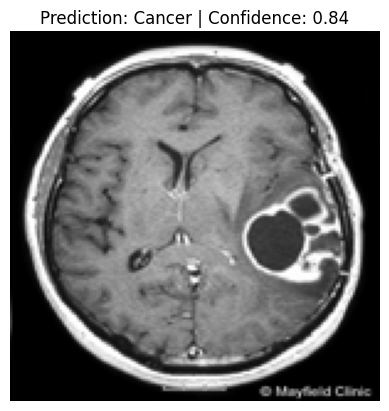

In [7]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():

    img = Image.open(filename).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = gru.predict(img_array)[0][0]

    if prediction > 0.5:
        label = "Not Cancer"
        confidence = prediction
    else:
        label = "Cancer"
        confidence = 1 - prediction

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label} | Confidence: {confidence:.2f}")
    plt.show()
